In [ ]:
# Elena Pashkova, n01587121

<!-- import -->

In [2]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('dark_background')
import pandas as pd
from IPython import display
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/ML/A6/Student-Pass-Fail-Data.csv')
data.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [10]:
# Features
X = data[['Self_Study_Daily', 'Tution_Monthly']]
X.head()

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42


In [8]:
# count values
data['Pass_Or_Fail'].value_counts()

Pass_Or_Fail
0    501
1    499
Name: count, dtype: int64

In [11]:
#Target_Variable
y = data['Pass_Or_Fail']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Pass_Or_Fail, dtype: int64

Getting training and test sets by splitting data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test.shape

(200, 2)

Feature scaling

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic regression

In [14]:
# logistic Regression Classifier
model = LogisticRegression()
# fitting model on the training data
LR = model.fit(X_train, y_train)

In [15]:
# predictions and probabilities
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[9.09044827e-01, 9.09551731e-02],
       [9.99845985e-01, 1.54014777e-04],
       [4.68027620e-02, 9.53197238e-01],
       [9.99999649e-01, 3.50866952e-07],
       [1.35461716e-01, 8.64538284e-01],
       [1.35461716e-01, 8.64538284e-01],
       [9.99999989e-01, 1.07972140e-08],
       [9.99998880e-01, 1.11965897e-06],
       [4.27740469e-02, 9.57225953e-01],
       [6.77264374e-02, 9.32273563e-01],
       [1.35461716e-01, 8.64538284e-01],
       [9.09044827e-01, 9.09551731e-02],
       [9.99552847e-01, 4.47152690e-04],
       [2.67510501e-02, 9.73248950e-01],
       [7.39238210e-02, 9.26076179e-01],
       [9.99998770e-01, 1.23029299e-06],
       [4.68027620e-02, 9.53197238e-01],
       [8.06392507e-02, 9.19360749e-01],
       [9.97205699e-01, 2.79430059e-03],
       [9.69598813e-01, 3.04011873e-02],
       [9.99995686e-01, 4.31393578e-06],
       [4.68027620e-02, 9.53197238e-01],
       [2.22584691e-02, 9.77741531e-01],
       [7.57983282e-01, 2.42016718e-01],
       [7.392382

In [16]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [17]:
# class probabilities and predictions
df = pd.DataFrame({
    "Prob_class_0": np.round(y_pred_prob[:, 0], decimals=2),
    "Prob_class_1": np.round(y_pred_prob[:, 1], decimals=2),
    "Predicted class": y_pred
})

print(df)

     Prob_class_0  Prob_class_1  Predicted class
0            0.91          0.09                0
1            1.00          0.00                0
2            0.05          0.95                1
3            1.00          0.00                0
4            0.14          0.86                1
..            ...           ...              ...
195          1.00          0.00                0
196          0.04          0.96                1
197          1.00          0.00                0
198          1.00          0.00                0
199          1.00          0.00                0

[200 rows x 3 columns]


In [18]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0])

In [19]:
y_test

521    0
737    0
740    1
660    0
411    1
      ..
408    0
332    1
208    0
613    0
78     0
Name: Pass_Or_Fail, Length: 200, dtype: int64

In [20]:
y_pred == y_test

521    True
737    True
740    True
660    True
411    True
       ... 
408    True
332    True
208    True
613    True
78     True
Name: Pass_Or_Fail, Length: 200, dtype: bool

Acufracy

In [21]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 98.50


very good result in accuracy, continuing work

Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

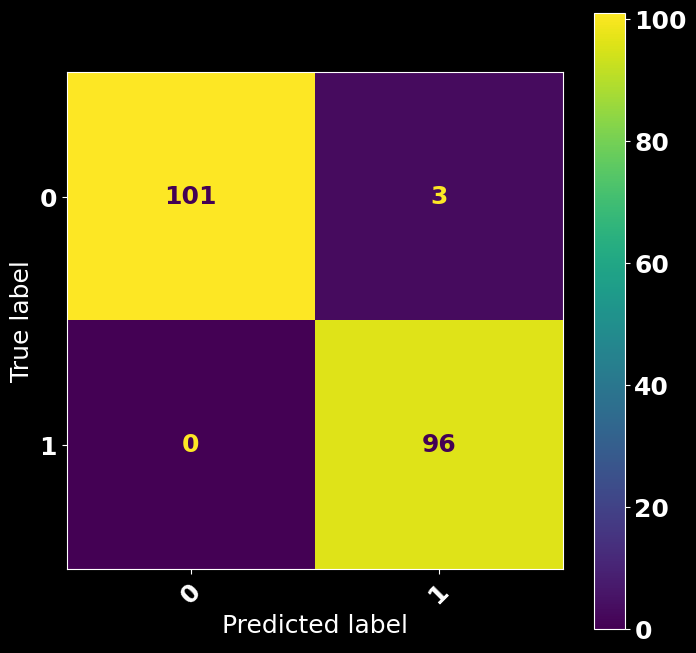

In [30]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

#Calculating Accuracy, Precision, Recall anf F1-Score

In [31]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.985,0.984848,0.985577,0.984991


The Logistic Regression model performed exceptionally well in the classification task:

- **Confusion Matrix**: High true positives and true negatives, few false positives and false negatives.
- **Accuracy**: 99.48%, correctly predicting the outcome in most cases.
- **Precision**: 99.57%, highly precise in predicting the positive class.
- **Recall**: 99.49%, identifying the positive class almost perfectly.
- **F1-Score**: 99.53%, indicating excellent balanced performance.

These metrics show that the model is reliable and effective, with strong predictive power and minimal error.